<img src = "https://rec-data.kalibrr.com/www.kalibrr.ph/logos/SSYTB3EN2CEV9HZDWPPE4JHP8X2T7CNC6SDZST8Y-5d0b4f4b.png" width = 800>

**Aditya Gumilar**

**PYTN_KS05_002**

```
Kalau kita buat listnya/summary dari perintah di module kode id :

1. Area Plot (a)
2. Histogram (a)
3. Bar Chart (a)
4. Pie Chart (a)
5. Box Plot  (a)
6. Scatter Plot (a)
7. Word Clouds
8. Folium Maps
9. Overall Analysis

*for each plot (1 - 9):
- Question/what data we want to visualize
- Pre-processing if needed
- (a)or analysis :: Conclusion / Kesimpulan
```

**Data Preparation**

In [1]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from timeit import default_timer
import folium
mpl.style.use(['ggplot'])
%matplotlib inline

In [2]:
# Load Dataset London_crime
df_LC = pd.read_csv('london_crime_by_lsoa.csv')
df_LC

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


In [3]:
# Mengecek jumlah baris dan kolom dari dataset yang digunakan (Terdapat 13.490.604 baris dan 7 kolom)
df_LC.shape

(13490604, 7)

In [4]:
df_LC.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


In [5]:
# Mengecek dtype untuk setiap value pada kolom
df_LC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [6]:
# Mengecek apakah dataset masih memiliki missing values atau tidak 
df_LC.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

---
# Area Plot

**Question:**
1. Kejahatan apa yang memiliki kasus tertinggi di London? 
2. Wilayah mana saja yang memiliki kasus kejahatan tertinggi dan terendah di London?
3. Buatlah sebuah visualisasi menggunakan area plot untuk menampilkan wilayah yang memiliki kasus kejahatan tertinggi dan kasus kejahatan terendah !

## Preprocessing Data

Pertama, kita mengelompokkan terlebih dahulu data pada major_category menggunakan .groupby(). Selanjutnya menambahkan fungsi sum() untuk menjumlahkan semua kasus kriminal pada kolom major_cateogry, sehingga kita mengetahui kasus yang paling banyak terjadi. Yang terakhir kita lakukan sorting secara Descending (Dari besar ke kecil)

In [7]:
df_LC.groupby('major_category').value.sum().sort_values(ascending=False)

major_category
Theft and Handling             2661861
Violence Against the Person    1558081
Burglary                        754293
Criminal Damage                 630938
Drugs                           470765
Robbery                         258873
Other Notifiable Offences       106349
Fraud or Forgery                  5325
Sexual Offences                   1273
Name: value, dtype: int64

Berdasarkan output diatas, kita bisa mengetahui bahwa Theft and Handling merupakan kasus yang paling sering terjadi di London. Selanjutnya kita akan membuat variable baru yaitu df_Theft untuk menampung semua value yang berkorelasi dengan Theft and Handling

In [8]:
df_Theft = df_LC[df_LC.major_category == 'Theft and Handling']
df_Theft

,lsoa_code,borough,major_category,minor_category,value,year,month
5,E01001320,Ealing,Theft and Handling,Other Theft,0,2012,5
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
10,E01001985,Haringey,Theft and Handling,Motor Vehicle Interference & Tampering,0,2013,12
14,E01002398,Hillingdon,Theft and Handling,Theft/Taking Of Motor Vehicle,0,2016,2
16,E01000086,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2009,5
...,...,...,...,...,...,...,...
13490590,E01001679,Greenwich,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2012,4
13490593,E01004531,Wandsworth,Theft and Handling,Handling Stolen Goods,0,2014,12
13490596,E01000655,Bromley,Theft and Handling,Theft From Shops,0,2010,7
13490597,E01000588,Brent,Theft and Handling,Theft/Taking of Pedal Cycle,0,2014,10


Selanjutnya kita akan mencari wilayah yang memiliki kasus theft and handling tertinggi dan terendah

In [9]:
df_twobor = df_Theft.groupby('borough').value.sum().sort_values(ascending=False)
df_twobor

borough
Westminster               277617
Camden                    140596
Lambeth                   114899
Southwark                 109432
Islington                 107661
Newham                    106146
Kensington and Chelsea     95963
Ealing                     93834
Wandsworth                 92523
Croydon                    91437
Hackney                    91118
Tower Hamlets              87620
Barnet                     87285
Hammersmith and Fulham     86381
Haringey                   83979
Hillingdon                 80028
Waltham Forest             77940
Brent                      72523
Redbridge                  71496
Lewisham                   70382
Enfield                    70371
Hounslow                   70180
Bromley                    69742
Greenwich                  64923
Havering                   52609
Barking and Dagenham       50999
Merton                     44128
Richmond upon Thames       40858
Harrow                     40800
Bexley                     40071
Su

Berdasarkan output diatas, wilayah yang memiliki kasus tertinggi dari theft and handling adalah Westminster, sedangkan wilayah dengan kasus theft and handling terendah adalah City of London.

Selanjutnya membuat variabel df_theft_west untuk menampung value dari wilayah Westminster, dan df_theft_cilon untuk menampung value dari wilayah City of London

In [10]:
df_theft_west = df_Theft[df_Theft.borough == 'Westminster'].groupby('year').value.sum()
df_theft_cilon = df_Theft[df_Theft.borough == 'City of London'].groupby('year').value.sum()

In [11]:
print(df_theft_west)
print('=========================')
print(df_theft_cilon)

year
2008    29266
2009    29967
2010    29191
2011    33529
2012    38152
2013    33868
2014    28144
2015    27980
2016    27520
Name: value, dtype: int64
year
2008      0
2009      0
2010      0
2011     45
2012    121
2013     79
2014     83
2015    104
2016    129
Name: value, dtype: int64


Selanjutnya membuat variable baru dengan nama comb1 yang akan digunakan untuk menggabungkan data df_theft_west dan df_theft_cilon. Dalam menggabungkan data kita bisa menggunakan sebuah dictionary.

In [12]:
comb1 = {'Westminster' : df_theft_west,
         'City of London' : df_theft_cilon
}

# df_comb1 digunakan untuk membangun sebuah dataframe dengan parameter comb1
df_comb1 = pd.DataFrame(comb1)
df_comb1

,Westminster,City of London
year,,
2008,29266,0
2009,29967,0
2010,29191,0
2011,33529,45
2012,38152,121
2013,33868,79
2014,28144,83
2015,27980,104
2016,27520,129


## Create Visualization

Selanjutnya buatlah visualisasi dengan menggunakan data df_comb1, dimana data tersebut berisikan wilayah yang memiliki kasus tertinggi dan terendah dari kejahatan theft and handling

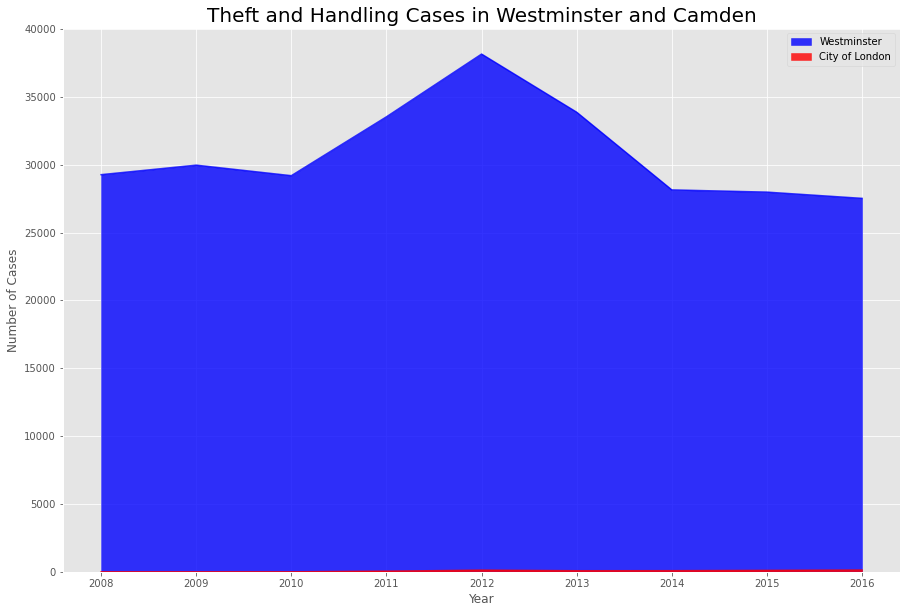

In [13]:
color = ['Blue', 'Red']
df_comb1.plot(kind='area', figsize=(15,10), stacked = False, alpha=0.8,color=color)
plt.title('Theft and Handling Cases in Westminster and Camden', fontsize = 20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)

plt.legend()
plt.show()

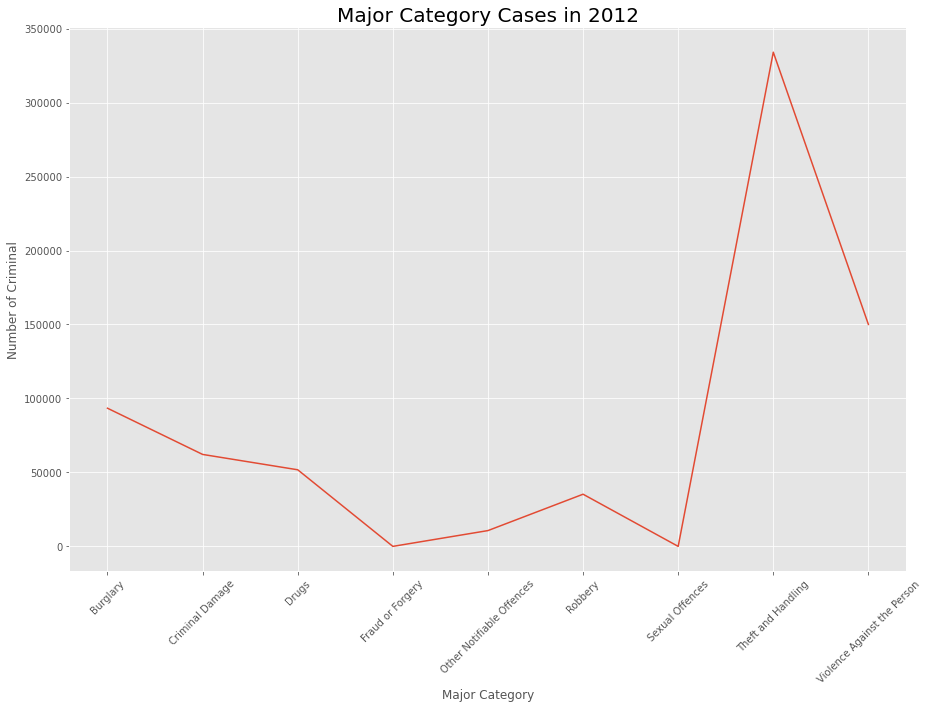

In [14]:
# just added line plot visualization about trend of major category
majorc = df_LC[(df_LC.year == 2012)]
df_majorcategory = majorc.groupby('major_category')['value'].sum()
df_majorcategory.plot(kind='line', figsize=(15,10))
plt.title('Major Category Cases in 2012', fontsize=20)
plt.ylabel('Number of Criminal')
plt.xlabel('Major Category')
plt.xticks(rotation=45)
plt.show()

**Conclusion:** 

Berdasarkan hasil preprocessing dan plottingan data, maka dapat ditarik kesimpulan bahwa kasus kejahatan tertinggi di London adalah Theft and Handling. Wilayah yang terindikasi memiliki kasus kejahatan Theft and Handling tertinggi yaitu Westminster dan kasus kejahatan Theft and Handling terendah yaitu City of London. Bisa dilihat pada visualisasi area plot diatas bahwa wilayah Westminster mendominasi warna pada area plot dengan kasus tertinggi pada tahun 2012 sebanyak +- 38000.

---
# Histogram

**Question:**
1. Bagaimana distribusi kasus persebaran kriminal di London pada tahun 2012?
2. Bagaimana laju pertumbuhan kasus kriminal dengan kategori minor pada tahun 2016?

## Preprocessing Data

Pertama, kita menggabungkan data tahun 2012 berdasarkan kolom borough, kemudian hitung value dari data yang telah digabungkan menggunakan fungsi sum(). Selanjutnya variable df_hist2012 digunakan untuk menampung hasil preprocessing data. 

In [15]:
df_hist2012 = df_LC[df_LC.year == 2012].groupby('borough').value.sum()
df_hist2012.sort_values(ascending=False).head()

borough
Westminster    59226
Lambeth        33473
Camden         31472
Southwark      30737
Croydon        30189
Name: value, dtype: int64

Selanjutnya, kita mencari nilai atau jumlah kasus menggunakan data minor_category pada tahun 2016

In [16]:
bor2016 = df_LC[(df_LC.year == 2016)]
df_bor2016 = bor2016.groupby('minor_category').value.sum()
print(df_bor2016)

minor_category
Assault with Injury                        50038
Burglary in Other Buildings                25289
Burglary in a Dwelling                     42996
Business Property                           1654
Common Assault                             64440
Counted per Victim                             0
Criminal Damage To Dwelling                13951
Criminal Damage To Motor Vehicle           25787
Criminal Damage To Other Building           6700
Drug Trafficking                            3392
Going Equipped                               604
Handling Stolen Goods                       1377
Harassment                                 78676
Motor Vehicle Interference & Tampering     11438
Murder                                       101
Offensive Weapon                            5013
Other Criminal Damage                      17633
Other Drugs                                  319
Other Fraud & Forgery                          0
Other Notifiable                           15205
Other

## Create Visualization

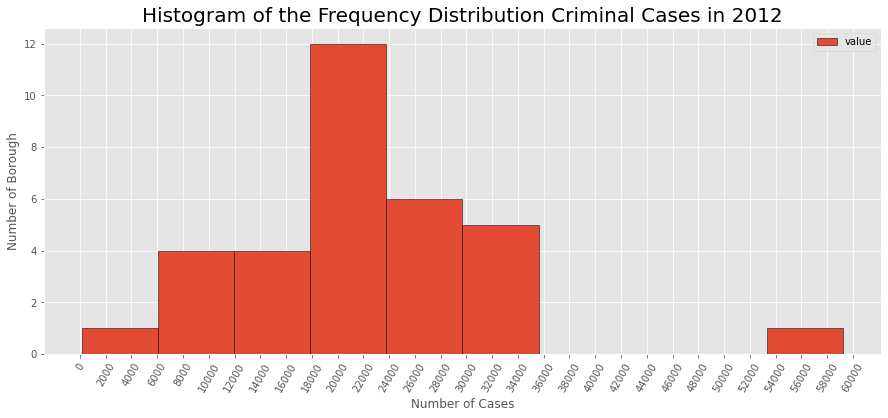

In [17]:
count, bin_edges = np.histogram(df_hist2012, 15)

df_hist2012.plot(kind='hist',
                 figsize=(15, 6),
                 bins=10,
                 xticks=bin_edges,
                 edgecolor='black'
                 )

plt.title('Histogram of the Frequency Distribution Criminal Cases in 2012', fontsize=20)
plt.ylabel('Number of Borough')
plt.xlabel('Number of Cases')
list_ran = np.arange(0, 62000, 2000)
plt.xticks(list_ran)
plt.xticks(rotation=60)
plt.legend()
plt.show()


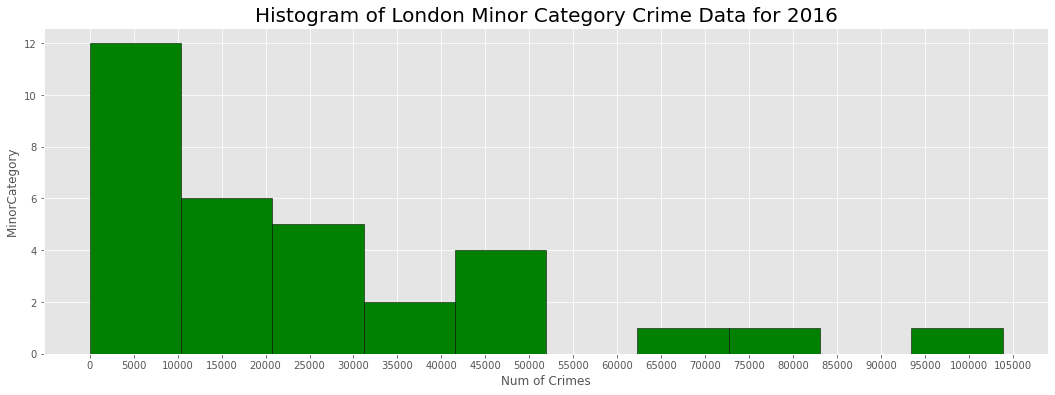

In [18]:
df_bor2016.plot(kind="hist", figsize=(18, 6), edgecolor='black', color='green')

plt.title('Histogram of London Minor Category Crime Data for 2016', fontsize=20) 
plt.ylabel('MinorCategory ') 
plt.xlabel('Num of Crimes') 
list_rangex = np.arange(0, 110000, 5000)
plt.xticks(list_rangex)
plt.show()

**Conclusion:** 
1. Berdasarkan hasil dari visualisasi histogram pertama (red), pada tahun 2012 terdapat 12 wilayah dengan jumlah kasus kriminal yaitu berkisar antara 18.000 hingga 24.000 kasus. Terdapat 1 wilayah yang memiliki Kasus kriminal terkecil dengan jumlah berkisar antara 0 sampai 6000 kasus. Selanjutnya kasus terbanyak ada pada 1 wilayah yakni berkisar antara 53.000 sampai dengan 59.000 kasus.
2. Berdasarkan hasil dari visualisasi histogram kedua (green), pada tahun 2016 terdapat 12 kasus dengan  jumlah kasus kriminal terendah yaitu berkisar antara 0 hingga 10.000 kasus, dan juga terdapat 1 wilayah yang memiliki Kasus kriminal tertinggi dengan jumlah kasus berkisar antara 93.000 sampai 103.000 kasus.

---
# Bar Chart


**Question:**
1. Carilah 4 Wilayah yang memiliki kasus kriminal tertinggi dan kasus kriminal terendah dari tahun 2008-2016!
2. Visualisasikan hasilnya kedalam sebuah BarChart!

## Preprocessing Data

Pertama, kita akan menjumlahkan total kasus kejahatan berdasarkan wilayah. Selanjutnya kita akan menampilkan datanya dalam bentuk Descending (dari jumlah kasus terbesar ke terkecil).

In [19]:
df_borough = df_LC.groupby('borough').value.sum().sort_values(ascending=False)

In [20]:
df_top4br = df_borough.head(4).sort_values(ascending=True) # Menampilkan data dengan 4 wilayah teratas
df_bot4br = df_borough.tail(4).sort_values(ascending=False) # Menampilkan data dengan 4 wilayah terendah

In [21]:
print(df_top4br.sort_values(ascending=False))
print("")
print(df_bot4br.sort_values(ascending=True))

borough
Westminster    455028
Lambeth        292178
Southwark      278809
Camden         275147
Name: value, dtype: int64

borough
City of London             780
Kingston upon Thames     89306
Richmond upon Thames     96771
Sutton                  100987
Name: value, dtype: int64


## Create Visualization

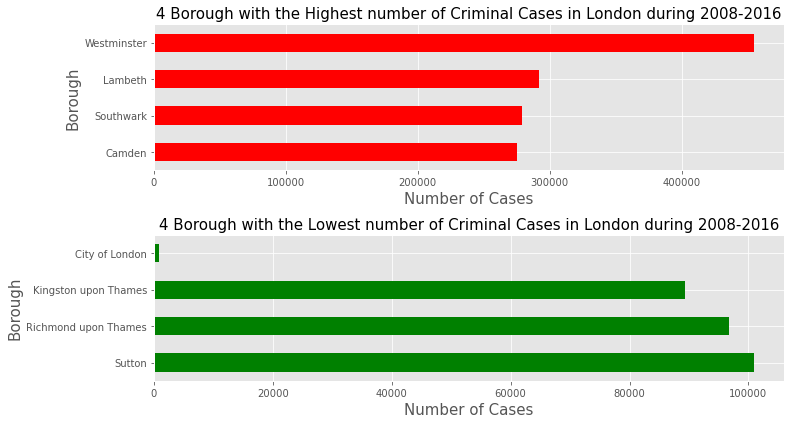

In [22]:
fig = plt.figure()

ax0 = fig.add_subplot(2, 2, 1) # top 4 borough
ax1 = fig.add_subplot(2, 2, 3) # bottom 4 borough

# Subplot 1: top 4 borough
df_top4br.plot(kind='barh', color='red', figsize=(20,6), ax=ax0)
ax0.set_title('4 Borough with the Highest number of Criminal Cases in London during 2008-2016', fontsize=15)
ax0.set_xlabel('Number of Cases', fontsize=15) 
ax0.set_ylabel('Borough', fontsize=15) 

# Subplot 2: bottom 4 borough
df_bot4br.plot(kind='barh', color='green', figsize=(20,6), ax=ax1)
ax1.set_title('4 Borough with the Lowest number of Criminal Cases in London during 2008-2016', fontsize=15) 
ax1.set_xlabel('Number of Cases', fontsize=15)
ax1.set_ylabel('Borough', fontsize=15) 

plt.tight_layout()
plt.show()

**Conclusion:**

Berdasarkan hasil dari data processing dan visualisasi BarChart, 4 wilayah dengan memiliki kasus kriminal tertinggi adalah Westminster, Lambeth, Southwark, dan Camden. Sedangkan 4 wilayah dengan kasus kriminal terendah adalah City of London, Kingston upon Thames, Richmond upon Thames, Sutton. Westminster menempati posisi tertinggi jumlah kasus kriminal yaitu sebanyak 455028 kasus, sedangkan wilayah City of London menempati wilayah terendah atau bisa dikatakan sebagai wilayah paling bersih yang hanya memiliki 780 kasus krimial dari tahun 2008-2016.

---
# Pie Chart

**Question**
1. Berdasarkan kategori major, kejahatan apa yang paling sering terjadi dari tahun 2008-2016?
2. Selanjutnya visualisasikan dengan menggunakan pie chart berdasarkan berdasarkan tahun 2008-2016, berdasarkan tahun 2015 dan tahun 2016!

## Preprocessing Data

In [23]:
# Mengelompokkan data berdasarkan major_category
df_majorcategory = df_LC.groupby('major_category', axis=0).sum().sort_values(by=['value'], ascending=False)
df_majorcategory

,value,year,month
major_category,,,
Theft and Handling,2661861,7980195600,25780950
Violence Against the Person,1558081,6381548928,20616336
Burglary,754293,2099731248,6783426
Criminal Damage,630938,4163174064,13449618
Drugs,470765,2373089616,7666542
Robbery,258873,1890040608,6105996
Other Notifiable Offences,106349,1561923648,5045976
Fraud or Forgery,5325,475878240,1537380
Sexual Offences,1273,217513296,702702


In [24]:
# Mengelompokkan data berdasarkan tahun
y2015 = df_LC[(df_LC.year == 2015)]
df_y2015 = y2015.groupby('major_category', axis=0).sum().sort_values(by=['value'], ascending=False)

y2016 = df_LC[(df_LC.year == 2016)]
df_y2016 = y2016.groupby('major_category', axis=0).sum().sort_values(by=['value'], ascending=False)

## Create Visualization

C:\Users\ASUS\AppData\Local\Temp/ipykernel_8856/4066193261.py:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax1.pie(sizes,


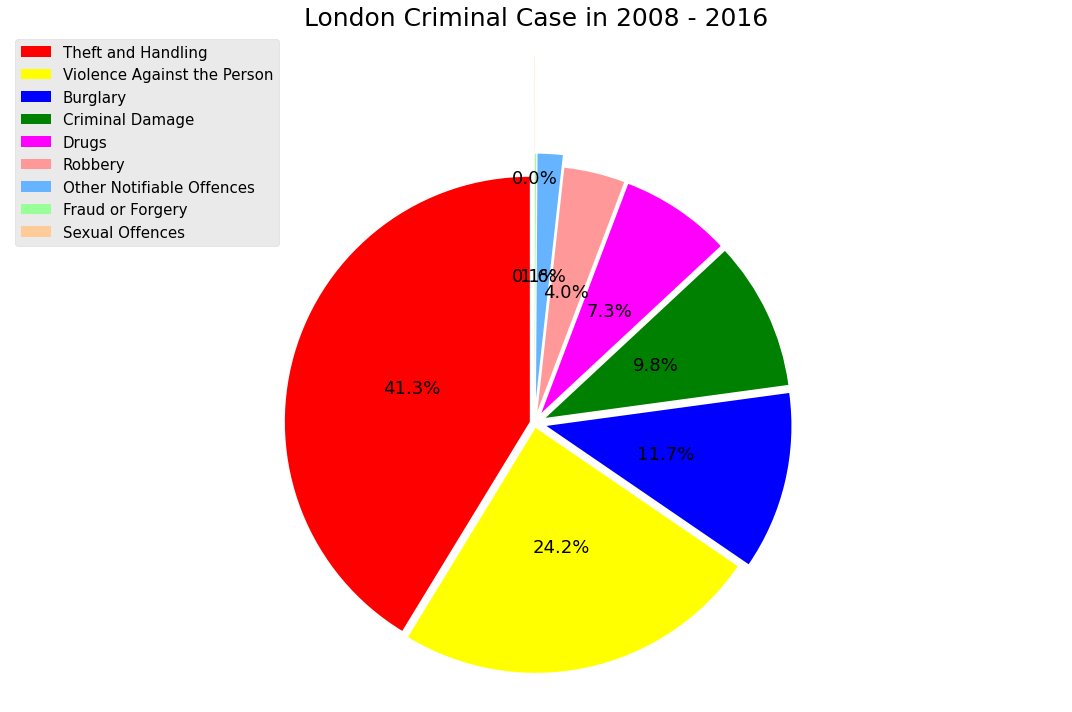

In [25]:
sizes = df_majorcategory.value
explode = [0.02, 0.02, 0.05, 0.05, 0.05, 0.05, 0.1, 0.1, 0.5]

#add colors
colors = ['red', 'yellow', 'blue', 'green', 'magenta', '#ff9999','#66b3ff','#99ff99','#ffcc99']
fig, ax1 = plt.subplots(figsize=(15,10))
ax1.pie(sizes, 
        explode=explode, 
        colors=colors, 
        autopct='%1.1f%%', 
        shadow=False, 
        pctdistance=0.5,
        textprops = {'fontSize':18},
        startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.title('London Criminal Case in 2008 - 2016', y=1, fontsize=25)
plt.legend (labels=df_majorcategory.index, loc='upper left', fontsize=15)
fig.set_facecolor('white')
plt.tight_layout()
plt.show()

C:\Users\ASUS\AppData\Local\Temp/ipykernel_8856/4000593602.py:14: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax0.pie(sizes1,
C:\Users\ASUS\AppData\Local\Temp/ipykernel_8856/4000593602.py:28: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax1.pie(sizes2,


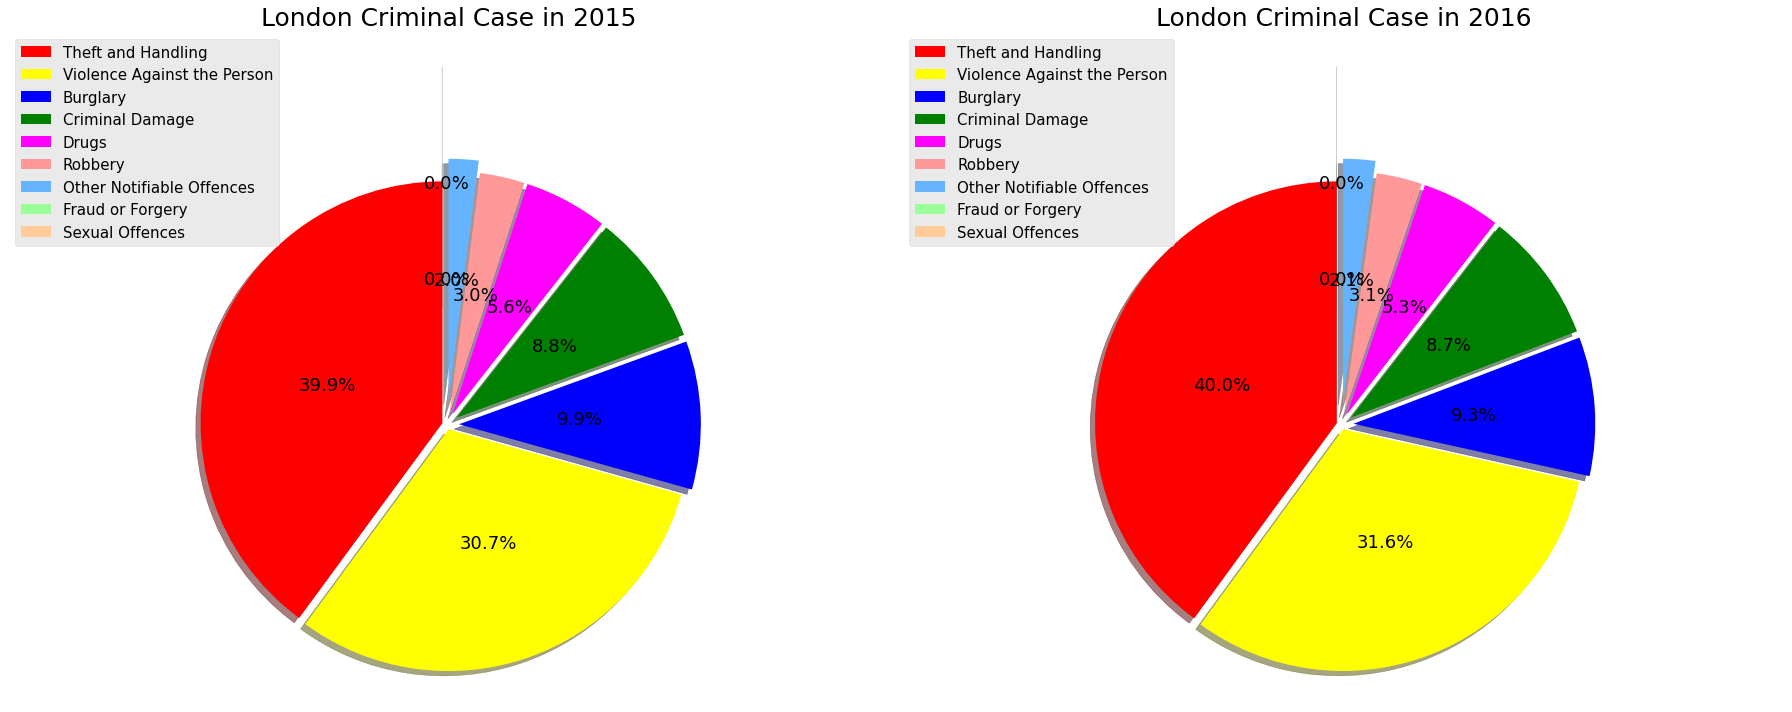

In [26]:
fig = plt.figure(figsize=(25,10))

sizes1 = df_y2015.value
sizes2 = df_y2016.value

explode = [0.02, 0.02, 0.05, 0.05, 0.05, 0.05, 0.1, 0.1, 0.5]

#add colors
colors = ['red', 'yellow', 'blue', 'green', 'magenta', '#ff9999','#66b3ff','#99ff99','#ffcc99']

ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

ax0.pie(sizes1, 
        explode=explode, 
        colors=colors, 
        autopct='%1.1f%%', 
        shadow=True, 
        pctdistance=0.5,
        textprops = {'fontSize':18},
        startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
ax0.axis('equal')
ax0.set_title('London Criminal Case in 2015', y=1, fontsize=25)
ax0.legend(labels=df_y2015.index, loc='upper left', fontsize=15)

ax1.pie(sizes2, 
        explode=explode, 
        colors=colors, 
        autopct='%1.1f%%', 
        shadow=True, 
        pctdistance=0.5,
        textprops = {'fontSize':18},
        startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
ax1.set_title('London Criminal Case in 2016', y=1, fontsize=25)
ax1.legend(labels=df_y2016.index, loc='upper left', fontsize=15)

fig.set_facecolor('white')
plt.tight_layout()
plt.show()

**Conclusion:**

1. Visualisasi gambar pertama menunjukan tentang presentase jumlah kasus kriminal dari tahun 2008-2016, kasus Theft and Handling menempati urutan teratas dengan jumlah kasus 41,3%, urutan kedua adalah Violence Against the Person sebanyak 24,2%, urutan ketiga adalah Burglary sebanyak 11,7% dan urutan keempat adalah Criminal Damage sebanyak 9,8%.
2. Berdasarkan Visualisasi gambar kedua yaitu dengan membandingkan antara jumlah presentase kasus kriminal pada tahun 2015 dan 2016, dapat ditarik kesimpulan bahwa dalam jangka waktu 1 tahun beberapa kasus mengalami kenaikan. Seperti pada kasus kriminal Theft and Handling dimana jika kita lihat pada tahun 2015 sebanyak 39,9% dan pada tahun 2016 meningkat menjadi 40,0%. Kasus lain yang mengalami peningkatan adalah Violence Against the Person dari yang tadinya 30,7% meningkat menjadi 31,6%. Ada juga kasus yang mengalami penurunan dalam jangka waktu 1 tahun, yaitu salah satunya Kasus Burglary dari yang tadinya 9,9% menjadi 9,3%

---
# Box Plot

**Question:**
1. Bandingkan distribusi jumlah kasus kriminal di London pada periode 2010-2016
2. Buatlah visualisasinya menggunakan boxplot
3. Periksalah tahun berapa yang memiliki pencilan atau outlier pada boxplot

## Preprocessing Data

In [27]:
# variable df_westmin digunakan untuk menampung data wilayah Westminster
df_westmin = df_LC[df_LC.borough == 'Westminster']
df_westmin

,lsoa_code,borough,major_category,minor_category,value,year,month
21,E01004660,Westminster,Theft and Handling,Handling Stolen Goods,0,2012,2
46,E01004678,Westminster,Criminal Damage,Other Criminal Damage,0,2008,11
74,E01032513,Westminster,Violence Against the Person,Wounding/GBH,0,2009,9
134,E01004674,Westminster,Theft and Handling,Motor Vehicle Interference & Tampering,1,2014,4
165,E01004677,Westminster,Theft and Handling,Other Theft Person,0,2015,10
...,...,...,...,...,...,...,...
13490302,E01004711,Westminster,Violence Against the Person,Assault with Injury,1,2015,6
13490346,E01004724,Westminster,Theft and Handling,Theft From Shops,1,2008,9
13490386,E01004654,Westminster,Robbery,Personal Property,0,2009,12
13490545,E01004712,Westminster,Theft and Handling,Other Theft,17,2012,6


In [28]:
# Menggabungkan data wilayah berdasarkan tahun
west2010 = df_westmin[df_westmin.year == 2010].groupby('month').value.sum()
west2011 = df_westmin[df_westmin.year == 2011].groupby('month').value.sum()
west2012 = df_westmin[df_westmin.year == 2012].groupby('month').value.sum()
west2013 = df_westmin[df_westmin.year == 2013].groupby('month').value.sum()
west2014 = df_westmin[df_westmin.year == 2014].groupby('month').value.sum()
west2015 = df_westmin[df_westmin.year == 2015].groupby('month').value.sum()
west2016 = df_westmin[df_westmin.year == 2016].groupby('month').value.sum()

In [29]:
# variable comb2 digunakan untuk membuat data dengan kolom berdasarkan tahun 
comb2 = {
    '2010' : west2010,
    '2011' : west2011,
    '2012' : west2012,
    '2013' : west2013,
    '2014' : west2014,
    '2015' : west2015,
    '2016' : west2016
}

# selanjutnya akan dibuat sebuah dataframe dengan menggunakan data comb2
df_westmin = pd.DataFrame(comb2)
df_westmin

,2010,2011,2012,2013,2014,2015,2016
month,,,,,,,
1,3826,4041,5084,4749,4172,3997,4022
2,3701,3765,4381,4431,3825,3403,3755
3,4166,4293,5362,4577,4349,3974,3703
4,4068,4187,4623,4458,3684,3757,3736
5,4038,4359,5104,4309,3821,4048,3789
6,3897,4606,4797,4506,3887,3790,3785
7,4407,4619,5428,4758,3806,3933,4357
8,4089,3852,5246,4640,3917,3944,4291
9,3986,4607,4341,4047,3787,3731,3773


In [30]:
df_westmin.describe()

,2010,2011,2012,2013,2014,2015,2016
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,4009.666667,4520.250000,4935.500000,4487.666667,3963.666667,3949.583333,4027.500000
std,194.764349,548.341984,359.861968,193.082334,213.391375,263.903033,331.939069
min,3701.000000,3765.000000,4341.000000,4047.000000,3684.000000,3403.000000,3703.000000
25%,3879.250000,4150.500000,4726.500000,4428.250000,3817.250000,3781.750000,3768.500000
50%,4012.000000,4482.500000,5018.000000,4482.000000,3902.000000,3959.000000,3905.500000
75%,4108.250000,4783.500000,5171.750000,4592.750000,4064.750000,4080.750000,4279.000000
max,4407.000000,5333.000000,5428.000000,4758.000000,4349.000000,4414.000000,4751.000000


## Create Visualization

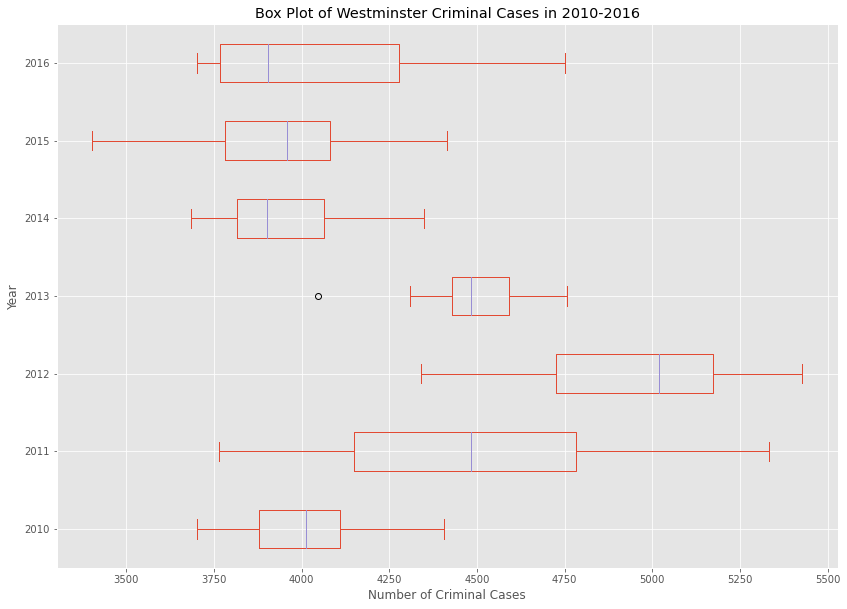

In [31]:
df_westmin.plot(kind='box', figsize=(14, 10), vert=False)

plt.title("Box Plot of Westminster Criminal Cases in 2010-2016")
plt.ylabel('Year')
plt.xlabel('Number of Criminal Cases')

plt.show()

**Conclusion:**
Berdasarkan visualisasi yang telah dibangun menggunakan boxplot, masing-masing tahun memiliki jumlah distribusi yang berbeda dalam jumlah kasus kriminal. Pada tahun 2012 memiliki jumlah kasus kriminal paling tinggi dan tahun 2014 memiliki jumlah kasus terendah. Selain itu, terdapat outlier atau pencilan pada Tahun 2013. Outlier atau pencilan merupakan suatu nilai yang melenceng atau jauh dari nilai seharusnya. Jika di misalkan terdapat angka : 1,2,3,50,6,7 maka yang termasuk outlier adalah angka 50.

---
# Scatter Plot

**Question:**
1. Hitunglah banyaknya kasus Drugs setiap tahunnya! (periode 2008-2016)
2. Carilah tahun yang memiliki Jumlah kasus Drugs tertinggi!
3. Pada tahun 2012, kasus kriminalitas tertinggi dan terendah ada di bulan apa? 
3. Buatlah visualisasinya menggunakan Scatter Plot

## Preprocessing Data

In [32]:
df_drugs = df_LC[df_LC.major_category == 'Drugs'].groupby('year').value.sum() # mengelompokkan data drugs berdasarkan tahun
dr = {'Drugs': df_drugs} # membuat data untuk menambah nama kolom Drugs
df_drugs = pd.DataFrame(dr) # data yang telah dibuat selanjutnya diubah menjadi dataframe
df_drugs.reset_index(inplace=True) # reset index 
df_drugs

,year,Drugs
0,2008,68804
1,2009,60549
2,2010,58674
3,2011,57550
4,2012,51776
5,2013,50278
6,2014,44435
7,2015,39785
8,2016,38914


In [33]:
df_month = df_LC[df_LC.year == 2012].groupby('month').value.sum() # mengelompokkan data tahun 2012 berdasarkan bulan
month = {'numofcase' : df_month} # membuat data untuk menambah nama kolom numofcase
df_month = pd.DataFrame(month) # data yang telah dibuat selanjutnya diubah menjadi dataframe
df_month.reset_index(inplace=True) #reset index
df_month

,month,numofcase
0,1,62436
1,2,56735
2,3,67537
3,4,58801
4,5,64344
5,6,62281
6,7,63280
7,8,62143
8,9,56912
9,10,61728


In [34]:
# mengubah value baris pada kolom month
df_month['month'].replace({1 : 'January',
                          2 : 'February', 
                          3 : 'March', 
                          4 : 'April', 
                          5 : 'May', 
                          6 : 'June', 
                          7 : 'July', 
                          8 : 'August', 
                          9 : 'September', 
                          10 : 'October', 
                          11 : 'November',
                          12 : 'December', }, 
                          inplace = True)
df_month

,month,numofcase
0,January,62436
1,February,56735
2,March,67537
3,April,58801
4,May,64344
5,June,62281
6,July,63280
7,August,62143
8,September,56912
9,October,61728


## Create Visualization

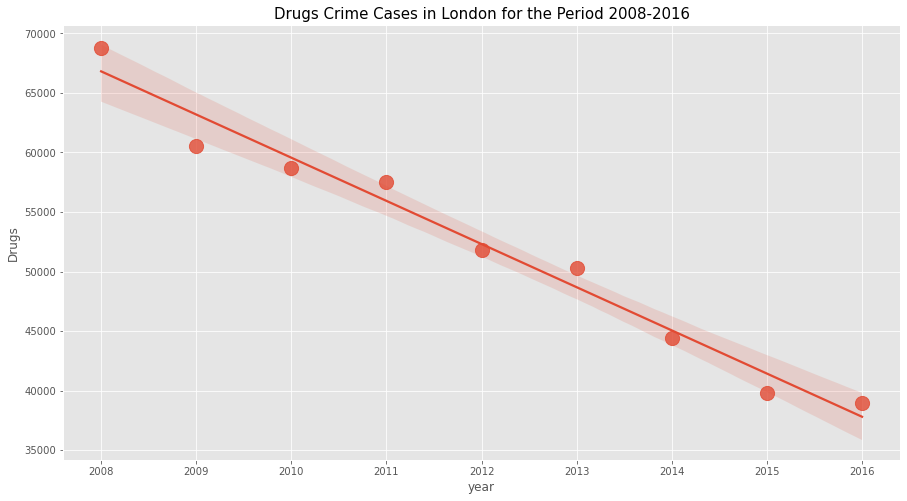

In [35]:
import seaborn as sns
plt.figure(figsize=(15,8), facecolor='white')
ax = sns.regplot(x='year', y='Drugs', data=df_drugs, scatter_kws={'s':200})

# Graded-Funtion End
plt.title("Drugs Crime Cases in London for the Period 2008-2016", fontsize=15)
plt.show()

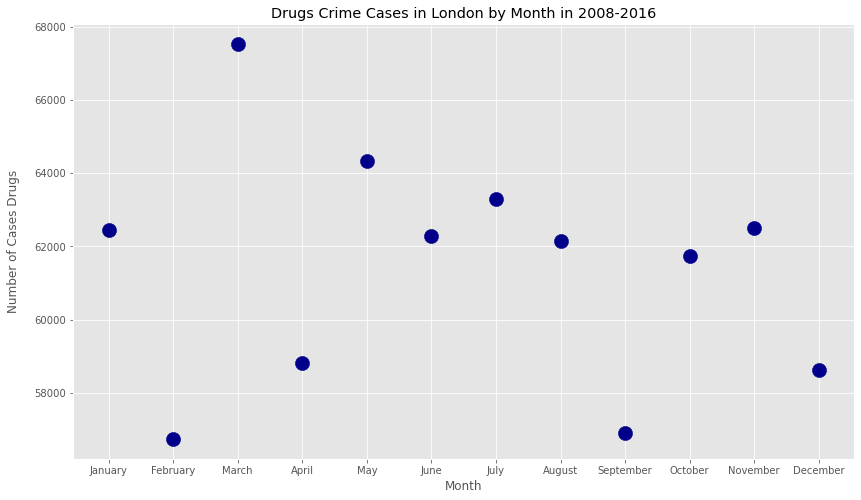

In [36]:
df_month.plot(kind='scatter', x='month', y='numofcase', color='darkblue', figsize=(14,8), s=[100*2]) # creating scatter plot

plt.title("Drugs Crime Cases in London by Month in 2008-2016")
plt.xlabel('Month')
plt.ylabel('Number of Cases Drugs', labelpad=14)
plt.show()

**Conclusion:**
1. Berdasarkan pada gambar visualisasi pertama, angka tertinggi dari kasus Drugs berada pada tahun 2008 sebanyak 68.804 kasus.
2. Pada gambar visualisasi kedua menampilkan jumlah kasus kriminal untuk masing-masing bulan di tahun 2012. Jumlah angka tertinggi dari kasus kriminal yang terjadi di London ada di bulan maret dengan jumlah kasus sebanyak 67.537, dan jumlah kasus terendah ada di bulan Februari sebanyak 56.735.

---
# Word Clouds

**Question:**

Selama tahun 2008-2016, apa nama kasus kriminal yang paling umum atau yang paling sering disebutkan di London? (Jika berdasarkan kategori minor pada dataset yang digunakan)

## Preprocessing Data

In [37]:
# menghitung data minor category berdasarkan value.
wcloud = df_LC.minor_category.value_counts()
wcloud

Common Assault                            522180
Theft From Motor Vehicle                  522180
Other Theft                               522180
Burglary in Other Buildings               522072
Theft/Taking Of Motor Vehicle             522072
Harassment                                522072
Criminal Damage To Motor Vehicle          521964
Assault with Injury                       521856
Other Criminal Damage                     521856
Possession Of Drugs                       521748
Burglary in a Dwelling                    521532
Criminal Damage To Dwelling               521424
Personal Property                         520668
Motor Vehicle Interference & Tampering    520452
Other Notifiable                          519696
Other Theft Person                        519480
Wounding/GBH                              519372
Theft/Taking of Pedal Cycle               516996
Other violence                            512028
Criminal Damage To Other Building         503928
Drug Trafficking    

## Create Visualization

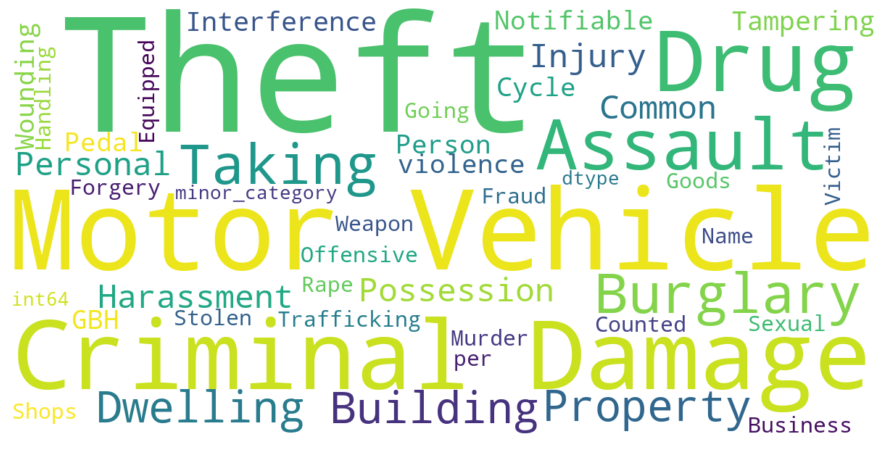

Elapsed time: 1 sec.


In [38]:
time1 = default_timer()

stopwords = set(STOPWORDS)
wcloud_crime = WordCloud(
    width=1200,
    height=600,
    background_color='white',
    stopwords=stopwords
).generate(str(wcloud))

plt.figure(figsize=(16, 8))
plt.imshow(wcloud_crime, interpolation='bilinear')
plt.axis('off')
plt.show()

time2 = default_timer()
print('Elapsed time: ' + str(round(time2-time1)) + ' sec.')

---
# Folium Maps

**Question:**
Tampilkanlah letak wilayah yang memiliki kasus kriminal tertinggi dan terendah di London selama periode 2008-2016!


In [39]:
london_map = folium.Map(location=[51.507066, -0.127402], zoom_start=12, tiles="Stamen Terrain")

folium.Marker(
    location=[51.497463, -0.135638],
    popup="Westminster",
    icon=folium.Icon(color='red', icon="info-sign"),
).add_to(london_map)

folium.Marker(
    location=[51.512284, -0.090454],
    popup="City of London",
    icon=folium.Icon(color="green", icon="info-sign"),
).add_to(london_map)


london_map

**Conclusion**

Berdasarkan hasil dari preprocessing data sebelumnya, jumlah kasus tertinggi ada di Wilayah Westminster dan jumlah kasus terendah ada di wilayah City of London. Dari hasil tersebut selanjutnya di visualisikan kedalam folium map. Wilayah Westminster ditandai dengan marker warna merah karena memiliki kasus tertinggi, sedangkan City of London ditandai dengan marker warna hijau karena memiliki jumlah kasus terendah. Bisa di klik pada marker tersebut untuk menampilkan nama wilayahnya.

# Overall Analysis

Telah dilakukan analisis terhadap dataset yang digunakan, dimana dataset tersebut menjelaskan tentang banyaknya kasus kriminal yang terjadi di negara London berdasarkan rincian bulan selama periode 2008-2016. Sebelum lanjut lebih jauh untuk memvisualisasikan data tersebut, pertama kita harus menganalisis apakah data yang digunakan masih terdapat missing values atau wrong data, jika tidak ada maka data sudah bisa dikatakan berkualitas. Visualisasi dapat dilakukan dengan menggunakan data secara keseluruhan, atau hanya mengambil beberapa data berdasarkan kategori tertentu. 


Pada visualisasi pertama, kita dapat mengetahui kasus kriminal tertinggi dan terendah di setiap wilayah London periode 2008-2016 menggunakan **Area Plot**. Biasanya, visualisasi ini digunakan untuk menampilkan cakupan area dalam trend waktu. Selanjutnya visualisasi **Histogram** dapat digunakan untuk mengetahui laju pertumbuhan banyaknya kasus kriminal berdasarkan kategori tertentu. Selain Histogram, ada juga visualisasi menggunakan **Barchart** atau diagram batang. Grafik ini digunakan untuk mengetahui kasus kriminal berdasarkan interval. Seperti pada visualisasi yang dibuat pada subab 3, kita dapat melihat wilayah dengan jumlah kasus kriminal tertinggi dan wilayah dengan jumlah kasus terendah. Masing-masing wilayah diambil 4 teratas untuk kasus kriminal tinggi, dan 4 wilayah untuk kasus kriminal rendah.


**Pie chart** dapat digunakan untuk memvisualisasikan data dalam bentuk presentase, dimana presentase tersebut harus mencapai 100%. Jadi nanti setiap pie akan memiliki jumlah presentase yang berbeda, tergantung nilai atau value pada data yang dipilih. Pada kasus ini, saya menampilkan jumlah kasus kriminal berdasarkan kategori major pada tahun 2015 dan 2016. Jika melihat perbandingan dari visualisasi tahun 2015 dan 2016, kita mengetahui jumlah persentase naik atau turunnya kasus kriminal dalam jangka waktu satu tahun. Selain itu, kita juga dapat mengetahui sebaran data dengan menggunakan **Boxplot**. Pada kasus ini, saya coba menganalisis sebearan data jumlah kasus kriminal di suatu wilayah dari tahun 2010-2016. Pada tahun 2011 memiliki jumlah sebaran data / box plot terpanjang. Namun sayangnya, pada tahun 2013 terdapat outlier.


Ada cara lain untuk mengetahui tren persebaran data dari waktu ke waktu, yaitu dengan menggunakan **Scatter Plot**. Di tahun 2012, kasus kriminal di bulan ferbruari sangatlah rendah berbanding terbalik dengan bulan maret yang memiliki kasus paling tinggi. Kita bisa melihat bahwa kasus kriminal meningkat drastis dalam waktu 1 bulan. Selain visualisasi dalam menentukan persebaran data dan menghitung jumlah presentase, ada juga visualisasi untuk menampilkan kata yang paling sering muncul, yakni dengan menggunakan **WorldCloud**. WorldCLoud merupakan visualisasi untuk mewakili kata-kata yang paling sering atau umum digunakan. Saya telah mencoba menganalisis kata yang paling sering muncul pada kategori major untuk mengidentifikasi kasus kriminal yang paling umum terjadi di London. Berdasarkan visualisasinya, ternyata kata-kata yang paling sering muncul adalah kejahatan Theft atau pencurian.


Yang terakhir, kita dapat menggunakan **Folium Maps** untuk memvisualisasikan letak masing-masing wilayah yang memiliki kejahatan. Sayangnya, dataset yang digunakan masih kurang lengkap karena tidak adanya data yang menunjukan letak atau titik koordinat lintang-bujur setiap wilayah. Jadi pada kasus ini, saya hanya menampilkan dua wilayah pada peta dengan mencari titik koordinat menggunakan bantuan google maps. Wilayah pertama adalah Westminster karena memiliki kasus tertinggi, ditandai dengan marker atau lokasi berwarna merah. Sedangkan wilayah kedua adalah City Of London karena memiliki kasus terendah dan ditandai dengan marker berwarna hijau.
